# Python-based Modelling For Transmission Dynamics of Contagious Bovine Pleuropneumonia


### Contributors: 
Rohan Chakraborty (rc@dynll.com),
Cam Lawrence (cam@dynll.com) &
Sohan Saldanha (sohan@dynll.com)
### Resources
Research paper: https://journals.vgtu.lt/index.php/MMA/article/view/11795/10209

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib as mpl
import matplotlib.pyplot as plt

In [43]:
# function that returns dy/dt
def model(y,t,mu,beta, gamma, alphaR,alphaQ,kappa,a,b,psi,N):
    
    y1=y[0] #s susceptible
    y2=y[1] #e exposed
    y3=y[2] #i infectious
    y4=y[3] #q persistently infected
    y5=y[4] #r recovered
    y6 = 6000
    #y6=y[0]+y[1]+y[2]+y[3]+y[4] #total population
    dy1dt = mu*N - beta*y1*y3 - mu*y1 #eq (3.1)
    dy2dt = beta*y1*y3/N - gamma*y2 - mu*y2 #eq (3.2)
    dy3dt = gamma*y2 + kappa*y4 - alphaR*y3 - a*y3/(b + y3) - alphaQ*y3 #eq (3.3)
    dy4dt = alphaQ*y3 - kappa*y4 - psi*y4 - mu*y4 #eq (3.4)
    dy5dt = alphaR*y3 + a*y3/(b + y3) + psi*y4 - mu*y5 #eq (3.5)
    
   
    
    return [dy1dt, dy2dt, dy3dt,dy4dt,dy5dt]


def main():
    print("Transmission Dynamics")

    N = 60000 # total population of germany
    #I0=N-1
    #I0=40e06
    S = 4000
    E = 1000
    Q = 500
    I=330 # initial number of infected
    R=2000 # initial number of immune
    #I0=1
    # initial condition
    y0 =  [S,E,I,Q,R] # susceptibles, infected, immune

    # parameters
    # half saturation constant
    b= 2
    #maximal resources supply
    a = 0.375
    #effective contact rate
    beta = 0.126
    #natural recovery rate
    alphaR = 0.0045
    #Rate of sequestrum formation of infectious cattle
    alphaQ = 0.013
    # resolution rate
    psi = 0.0075
    delta=1/365 # loss of immunity, on average after 1 year there remains no immunity anymore
    # natural birth and death rate
    mu = 1/(5*356)
    #transition rate
    gamma = 0.024
    # transmission coefficient
    k= 0.00009
    kappa = 0.00009
    
    # time points
    t = np.linspace(0,20*365,100000) # 1000 days
    # solve ODE
    y = odeint(model,y0,t,args=(mu,beta, gamma, alphaR,alphaQ,k,a,b,psi,N))

    y1=y[:,0]
    y2=y[:,1]
    y3=y[:,2]
    y4=y[:,3]
    y5=y[:,4]

    # plot results
    plt.plot(t,y1)
    plt.xlabel('time')
    plt.ylabel('S')
    plt.show()
    
    plt.plot(t,y2)
    plt.xlabel('time')
    plt.ylabel('E')
    plt.show()
    
    plt.plot(t,y3)
    plt.xlabel('time')
    plt.ylabel('I')
    plt.show()
    
    plt.plot(t,y3)
    plt.xlabel('time')
    plt.ylabel('Q')
    plt.show()
    
    plt.plot(t,y4)
    plt.xlabel('time')
    plt.ylabel('R')
    plt.show()

    # 3D-Plot
  
    from mpl_toolkits.mplot3d import Axes3D
    mpl.rcParams['legend.fontsize'] = 10
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(y1, y2, y3, y4,y5, label='orbit')
    ax.legend()
    plt.show()
    
    print('{:.3E}'.format(y[-1,0]))
    print('{:.3E}'.format(y[-1,1]))
    print('{:.3E}'.format(y[-1,2]))
    print('{:.3E}'.format(y[-1,3]))
    print('{:.3E}'.format(y[-1,4]))




Transmission Dynamics


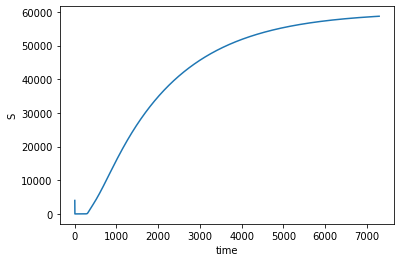

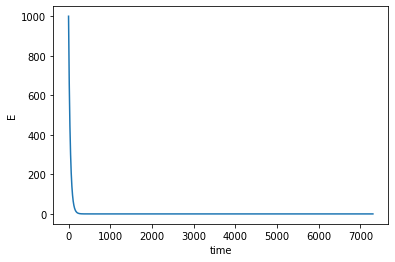

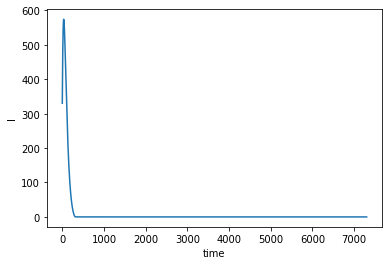

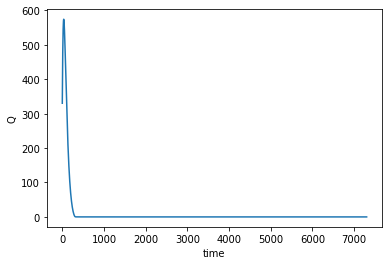

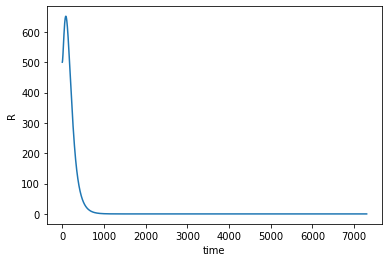

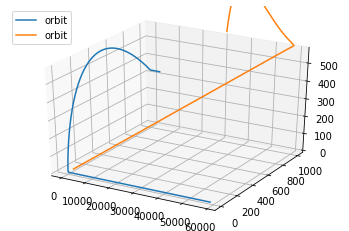

5.872E+04
-1.259E-11
-1.554E-12
6.542E-12
6.408E+01


In [44]:
if __name__ == '__main__':
    # call main program
    main()

    